## Deep dive into Seattle’s Airbnb market


### 1. Business Understanding

The Seattle Airbnb dataset contains the data of listing in Seattle, calendar and reviews. Using these data set we are going to answer few questions below.

We will try to understand the pricing trends of Airbnb in Seattle.

1. How does pricing fluctuates across different months of the year?
2. How does pricing increase or decrease by neighborhood and which ones are the priciest neighborhoods in Seattle?
3. How does price of different type of property and neighborhoods in seattle are related to each other?

I will perform analysis on charts to answer the above questions.

#### Price Prediction

And at last I will try to build a model based on linear Regression that will predict the price of Airbnb accomodation and what are the factors that decide the price of airbnb accomodations.

###  2. DATA UNDERSTANDING

   #### Section 2.1 Importing Libraries

In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

As a first step, I will be reading the 3 files part of the Seattle AirBnB dataset and exploring each of the datasets a bit.

   #### Section 2.2 Gathering Data

In [2]:
# Reading listing data set

df_listing = pd.read_csv('listings.csv')
pd.set_option('display.max_columns', None)
df_listing.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [3]:
#Reading Review data set

df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
# Reading Calendar data set

df_calendar = pd.read_csv('calendar.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


#### Section 2.3 Understanding Listing Data Set
Next, let's explore the Listings data set. We wil be looking at a few things:

1. Number of rows and columns in the dataset
2. Columns with missing values and columns that have no missing values
3. Describe the dataset to see features about each column
4. Explore some of the categorical features

In [5]:
# Print rows and columns in calendar data set
print(df_listing.shape)

# Assess null values

pd.set_option('display.max_rows',None)
df_listing.isnull().sum()

(3818, 92)


id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [6]:
# Describe

df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [7]:
# Explore Categorical Feature - host_location
df_listing['host_location'].value_counts()

Seattle, Washington, United States                                    3259
US                                                                     246
Spokane, Washington, United States                                      41
Kent, Washington, United States                                         34
Los Angeles, California, United States                                  13
Bellevue, Washington, United States                                     12
San Francisco, California, United States                                11
Mercer Island, Washington, United States                                10
Kirkland, Washington, United States                                      8
New York, New York, United States                                        6
Sammamish, Washington, United States                                     5
Vashon, Washington, United States                                        5
Seattle                                                                  5
Shoreline, Washington, Un

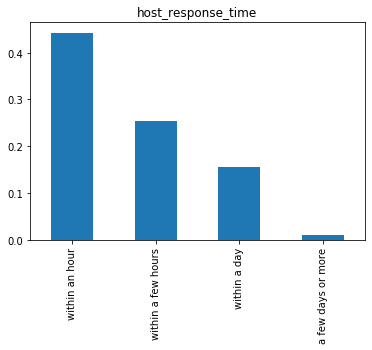

In [8]:
# Explore Categorical Feature - host_response_time
host_response_values= df_listing['host_response_time'].value_counts()
(host_response_values/df_listing.shape[0]).plot(kind="bar");
plt.title('host_response_time');

#### Observation

From the above chart we can say that response time of hosts are very good. About 45% of host respond within an hour to the customers.

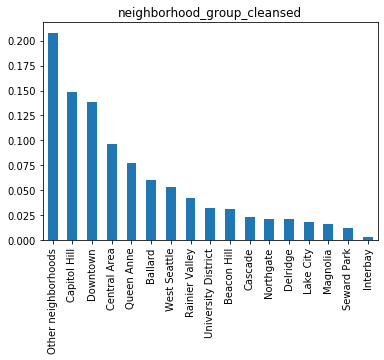

In [9]:
# Explore Categorical Feature - neighborhood_group_cleansed
neighborhood_val= df_listing['neighbourhood_group_cleansed'].value_counts()
(neighborhood_val/df_listing.shape[0]).plot(kind="bar");
plt.title("neighborhood_group_cleansed");

#### Observations

The above chart is left skewed graph. Apart from other neighborhood we can see that there is high number of accomodations in some particular neighborhood. Well there are two factors which are impacting these number.
1. Population- Population of Capital Hill and Downtown is much more than the population of Seaward Park and Interbay. So we can say that accomodations are high in densely populated areaa and also if there are more number of people they can offer more accomodation.
2. Tourist visit- With the help of some google skill I can say that these places are the most tourist visited place in Seattle.


Text(0.5, 1.0, 'property_type')

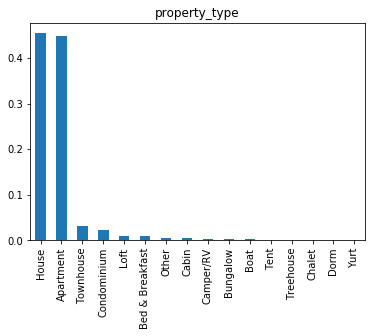

In [10]:
# Explore Categorical Feature - property_type
property_type= df_listing['property_type'].value_counts()
(property_type/df_listing.shape[0]).plot(kind= 'bar');
plt.title('property_type')

#### Observations

From the above chart we can easily distinguish which properties are higher in price

#### Section 2.4 Understanding the Calendar Data Set

Let's explore the Calendar data set first. We wil be looking at a few things:

1. Number of rows and columns in the dataset
2. Columns with missing values and columns that have no missing values
3. Describe the dataset to see features about each column

In [11]:
# Print rows and columns in calendar data set
print('number of rows and columns- ', df_calendar.shape)
# Assess null values
print('number of null values:\n', df_calendar.isnull().sum())
# Describe
df_calendar.describe(include= "all")

number of rows and columns-  (1393570, 4)
number of null values:
 listing_id         0
date               0
available          0
price         459028
dtype: int64


,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-07-07,t,$150.00
freq,NaN,3818,934542,36646
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN
75%,8.035212e+06,NaN,NaN,NaN


#### Section 2.5 Understanding Reviews Data Set
Next, let's explore the Reviews data set. We wil be looking at a few things:

1. Number of rows and columns in the dataset
2. Columns with missing values and columns that have no missing values
3. Describe the dataset to see features about each column

In [12]:
# Print rows and columns in reviews data set
print('number of rows and columns- ', df_reviews.shape)
# Assess null values
print('number of null values:\n', df_reviews.isnull().sum())
# Describe
df_reviews.describe(include= "all")

number of rows and columns-  (84849, 6)
number of null values:
 listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64


,listing_id,id,date,reviewer_id,reviewer_name,comments
count,8.484900e+04,8.484900e+04,84849,8.484900e+04,84849,84831
unique,NaN,NaN,1930,NaN,14380,84136
top,NaN,NaN,2015-09-21,NaN,David,The host canceled this reservation the day bef...
freq,NaN,NaN,580,NaN,870,57
mean,3.005067e+06,3.058765e+07,NaN,1.701301e+07,NaN,NaN
std,2.472877e+06,1.636613e+07,NaN,1.353704e+07,NaN,NaN
min,4.291000e+03,3.721000e+03,NaN,1.500000e+01,NaN,NaN
25%,7.946330e+05,1.725127e+07,NaN,5.053141e+06,NaN,NaN
50%,2.488228e+06,3.228809e+07,NaN,1.413476e+07,NaN,NaN
75%,4.694479e+06,4.457648e+07,NaN,2.762402e+07,NaN,NaN


### 3. Data Analysis

#### Section 3.1 Questions
1. How does pricing fluctuates across different months of the year?
2. How does pricing increase or decrease by neighborhood and which ones are the priciest neighborhoods in Seattle?
3. How does price of different type of property and neighborhoods in seattle are related to each other?

#### Section 3.1.1
1. How does pricing fluctuates across different months of the year?

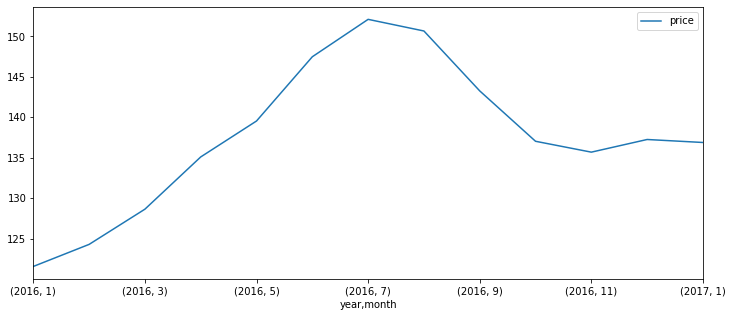

In [13]:
# Plot the average price by month 
df_calendar['year']= pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month']= pd.DatetimeIndex(df_calendar['date']).month
# In order to average price, we will be converting it to float and removing the $ sign
df_calendar['price']= df_calendar['price'].replace('[/$,]','', regex= True).astype(float)

df_calendar.groupby(['year','month'])['price'].mean().plot(figsize=(12,5));
plt.legend((['price']), loc= 1,  prop={'size': 10})


#### Observations

Now above chart is very intresting. From the above chart we can noticed at the starting of the year there is very less number of accomodations and there is a sudden increase in after June month. Lets answer these questions:
1. Why low accomodation in the starting of the year?
<br />Well it is most likely that people are having vacations in the Christmas and most of them return to there home before new year and seccond thing most people spent alot during christmas time and in til March most people are likely paying there credit card bills.
2. Why there is a spike after July?
<br />If we use our google skills we will find that to visit Seattle the most idle time is after June. This attracts more tourist.


#### Section 3.1.2
2. How does pricing increase or decrease by neighborhood and which ones are the priciest neighborhoods in Seattle?

In [14]:
# Plot the average price by neighborhood

# In order to average price, we will be converting it to float and removing the $ sign
df_listing['price']= df_listing['price'].replace('[\$,]','', regex= True).astype(float)

print(df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price', ascending= False))


                                price
neighbourhood_cleansed               
Southeast Magnolia         231.705882
Portage Bay                227.857143
Westlake                   194.470588
West Queen Anne            187.769231
Montlake                   182.789474
Briarcliff                 176.571429
Sunset Hill                176.055556
Industrial District        173.333333
Alki                       171.619048
Windermere                 169.900000
Pioneer Square             169.260870
Central Business District  164.213592
Fauntleroy                 164.100000
Belltown                   162.893162
East Queen Anne            159.414634
Madrona                    158.234043
Pike-Market                157.785714
North Queen Anne           150.240741
Green Lake                 149.018519
Lawton Park                147.566667
Holly Park                 147.166667
North Admiral              146.408163
View Ridge                 139.000000
Lower Queen Anne           138.202128
First Hill  

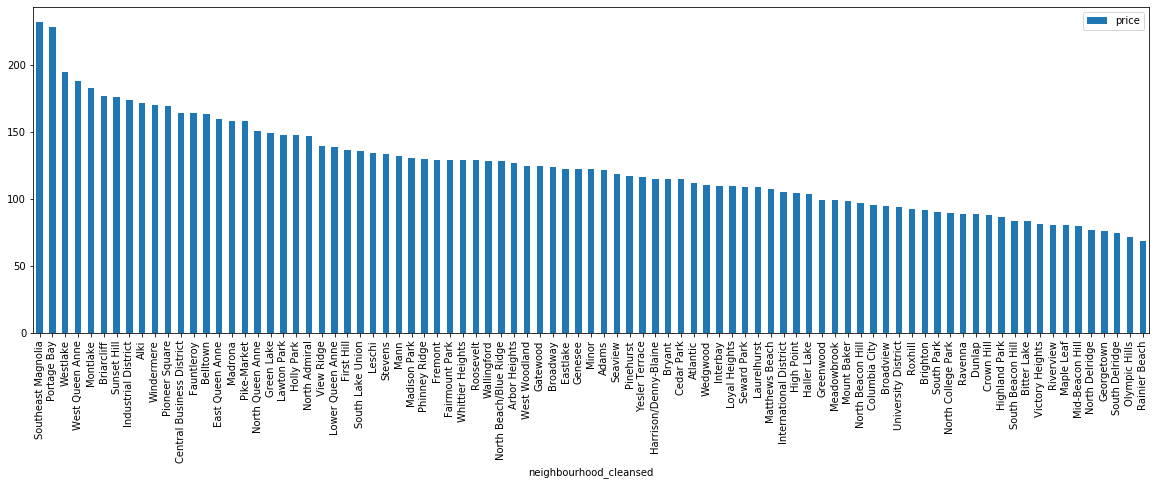

In [15]:
# Try to find relation between neighbourhood and price
neighborhood_price=df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price', ascending= False)
neighborhood_price.plot(kind= 'bar',figsize=(20,6));


#### Observations
From the above chart we can say that price among the different neighborhoods are quite distributed.Some of them are really costly like Southeast Magnolia is very costly and Rainier Beach is very cheap.

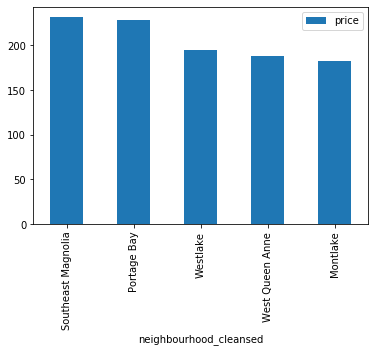

In [16]:
# Plot top 5 neighborhoods
top_5_neighbourhood=df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price', ascending= False).head()
top_5_neighbourhood.plot(kind= 'bar');

#### Oservations
From the above chart we have the five priciest neighborhood in Seattle.

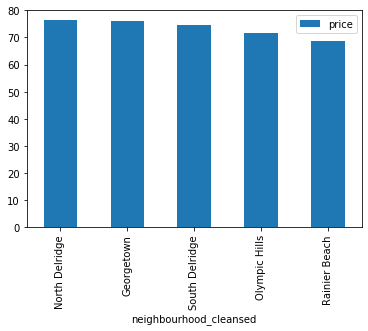

In [17]:
# Plot bottom 5 neighborhoods
bottom_5_neighbourhood=df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price', ascending= False).tail()
bottom_5_neighbourhood.plot(kind= 'bar');

#### Observation
From the above chart we have 5 cheapest neighborhood in Seattle.

#### Section 3.1.3
3. How does price of different type of property and neighborhoods in seattle are related to each other?

In [18]:
# Explore property types within neighborhoods and how they impact price
print('price of properties\n',df_listing.groupby(['property_type'])[['price']].mean().sort_values(by='price',ascending=False))
print('count of properties\n',df_listing['property_type'].value_counts())

price of properties
                       price
property_type              
Boat             282.375000
Condominium      151.109890
Loft             135.700000
House            132.351414
Townhouse        129.457627
Apartment        122.932670
Camper/RV        120.461538
Bungalow         115.615385
Bed & Breakfast  112.054054
Cabin            104.666667
Treehouse        101.000000
Yurt             100.000000
Chalet            98.500000
Other             94.681818
Tent              54.000000
Dorm              39.500000
count of properties
 House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64


#### Observation
 From above results we can say most priciest property are Boat and Condominium. However, most rented properties are House and Apartment.

In [19]:
# Focus on the top 5 expensive Neighborhoods from above - Southeast Magnolia, Portage Bay, Westlake, West Queen Anne and Montlake

keep_neighbourhood=('Southeast Magnolia','Portage Bay','Westlake','West Queen Anne', 'Montlake')
keep_property=('House','Apartment')

# Focus on property types - House and Apartment
df_listing_neighbourhood= df_listing.loc[df_listing['neighbourhood_cleansed'].isin(keep_neighbourhood)]
df_listing_property= df_listing_neighbourhood.loc[df_listing['property_type'].isin(keep_property)]

df_neighbourhood_property= df_listing_property.groupby(['neighbourhood_cleansed', 'property_type'])[['price']].mean().reset_index()
df_neighbourhood_property

,neighbourhood_cleansed,property_type,price
0,Montlake,Apartment,133.333333
1,Montlake,House,191.533333
2,Portage Bay,Apartment,113.833333
3,Portage Bay,House,340.285714
4,Southeast Magnolia,Apartment,219.600000
5,Southeast Magnolia,House,234.100000
6,West Queen Anne,Apartment,128.208333
7,West Queen Anne,House,247.393939
8,Westlake,Apartment,142.400000
9,Westlake,House,168.000000


In [20]:
price_arr = df_neighbourhood_property['price'].values

price_arr = np.reshape(price_arr, (5,2))
price_arr.shape

(5, 2)

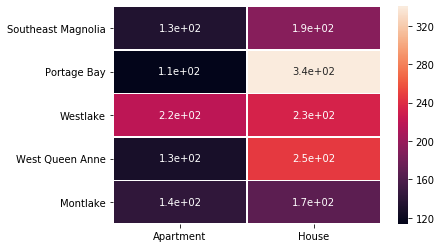

In [21]:
# Heatmap reference: https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe

idx= ['Southeast Magnolia','Portage Bay','Westlake','West Queen Anne', 'Montlake']
cols= ['Apartment','House']
df= pd.DataFrame(price_arr, index= idx, columns= cols)

plt.figure(figsize=(6,4))
sns.heatmap(df,linewidths=0.5 ,annot=True);

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 


#### Observations

We have focused on two things first is top 5 neibhorhoods and seccond is top 2 properties that is house and apartment.

From the above Heat Map we can observe that the houses in Portage Bay is more expensive followed by West Queen Anne. It is also intrsenting to note that the prices of Houses and Apartment are same in Westlake.

### 4. Data Preparation

#### Section 4.1 Handling non impacting columns

In [22]:
# Check if price has missing values, if it does, we want to remove those records from the dataset
df_listing['price'].isnull().sum()

0

In [23]:
df_listing.shape

(3818, 92)

In [24]:
# Drop columns that are less likely to have an impact on price
df_list = df_listing.copy()
cols_less_impact = ['id','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url','xl_picture_url',
                    'host_id','host_url','host_thumbnail_url','host_verifications','street','neighbourhood',
                    'neighbourhood_group_cleansed','zipcode','smart_location','country','latitude','longitude',
                    'weekly_price','monthly_price','calendar_updated','calendar_last_scraped','first_review',
                    'last_review','calculated_host_listings_count','reviews_per_month']
df_list = df_list.drop(cols_less_impact, axis=1)
df_list.shape

(3818, 65)

In [25]:
# Find columns with all missing values if any
df_list.columns[df_list.isnull().all()]

Index(['license'], dtype='object')

In [26]:
# Drop license column
df_list= df_list.drop('license', axis=1)
df_list.shape

(3818, 64)

#### Section 4.2 Handling missing values in Integer and Float columns

In [27]:
# Review all the numerical columns and assess missing values
num_cols = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

host_listings_count 2
host_total_listings_count 2
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656


#### Observations

bathrooms - There are 16 rows with Nan for bathrooms. Since it's a small percentage of rows, I have decided to set bathrooms to 0 for Nan values

bedrooms - Looking at the dataset, since all the rows with blank bedroom field have beds value of at least 1, I will use 1 for bedrooms where bedrooms is Nan

beds - For the 1 record that have beds as Nan, bed_type is specified as Real Bed, so I will set beds to 1 for this case

square_feet - Since a good percentage of this field is Nan, I am going to drop this column

review_scores columns - Since these are review related scores, I will be setting all Nan values to 0 assuming no review scores for these listings.

host_listings_count and host_total_listings_count - There are only 2 rows with no values. Looking at the data, I determined that these host IDs only have 1 record associated with them each, so I decided to populate with 1.

In [28]:
# Set 0 for bathroom where bathroom is Nan
df_list['bathrooms'] = df_list['bathrooms'].fillna(0)

# Set 1 for bedrooms where bedrooms is Nan
df_list['bedrooms'] = df_list['bedrooms'].fillna(1)

# Set 1 for beds where beds is Nan
df_list['beds'] = df_list['beds'].fillna(1)

# Drop square_feet column
df_list = df_list.drop('square_feet',axis=1)

# Set all review scores columns with 0 for Nan values
cols_fillna_0 = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for col in cols_fillna_0:
    df_list[col] = df_list[col].fillna(0)

# Set host_listings_count and host_total_listings_count to 1
df_list['host_listings_count'] = df_list['host_listings_count'].fillna(1)
df_list['host_total_listings_count'] = df_list['host_total_listings_count'].fillna(1)

In [29]:
# Check again all the numerical columns
num_cols = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,df_list[col].isnull().sum())

host_listings_count 0
host_total_listings_count 0
bathrooms 0
bedrooms 0
beds 0
price 0
review_scores_rating 0
review_scores_accuracy 0
review_scores_cleanliness 0
review_scores_checkin 0
review_scores_communication 0
review_scores_location 0
review_scores_value 0


#### Section 4.3 Handling missing values in objects columns

In [30]:
# Review all the categorical columns and assess missing values
cat_cols = df_list.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(col,df_list[col].isnull().sum())

name 0
summary 177
space 569
description 0
experiences_offered 0
neighborhood_overview 1032
notes 1606
transit 934
picture_url 0
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_picture_url 2
host_neighbourhood 300
host_has_profile_pic 2
host_identity_verified 2
neighbourhood_cleansed 0
city 0
state 0
market 0
country_code 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
security_deposit 1952
cleaning_fee 1030
extra_people 0
has_availability 0
requires_license 0
jurisdiction_names 0
instant_bookable 0
cancellation_policy 0
require_guest_profile_picture 0
require_guest_phone_verification 0


#### Observations
summary, space, neighborhood_overview, notes, transit - Since these are all text fields describing the property in some way, I have decided to convert these fields into boolean fields to indicate if a value exists. I am doing so that I can consider listings that have descriptive information available like summary and transit towards price prediction.

host_name, host_since, host_location, host_about, host_picture_url, host_neighbourhood - Since these are all fields that are descriptive about the host, I am going to convert these fields into boolean fields as well to indicate if a value exists or not.

host_response_time, host_acceptance_rate - These fields seems to have N/A as a valid value, so I will assign N/A where Nan values exist.

host_response_rate - Looking at the data, since this is a percentage value and the range is quite distributed, I will be converting this to float and setting N/A and blanks to 0.

host_is_superhost, host_has_profile_pic, host_identity_verified - These are boolean fields with t or f values. Assign 1 for t, 0 for f and assign Nans with 0

property_type - Since this is just 1 record, we will just drop this record

security_deposit - We will assume a 0 security deposit for where it is not specified. We will also remove $ signs and convert to float

cleaning_fee - We will assume a 0 cleaning_fee where it is not specified. We will also remove $ signs and convert to float

The following fields do not have missing values, but it is important to cleanse these as well.

name, description, picture_url - Since these are all text fields as well, I have decided to convert these fields into boolean fields to indicate if a value exists. I am doing so that I can consider listings that have descriptive information available like description and picture_url towards price prediction.

experiences_offered - all values in this column is 'None' and it doesn't add any value, so we will be dropping this column

market - all values are 'Seattle' in this column, since we have other descriptors for Seattle, we will be dropping this column

is_location_exact, has_availability, requires_license, instant_bookable, require_guest_profile_picture, require_guest_phone_verification - these fields have t/f values, will convert to 1/0.

extra_people - Need to remove $ sign and convert to float

jurisdiction_names - All values are 'WASHINGTON', doesn't add much value, will be dropping this column

city - There are some inconsistencies in this field where we have several values for Seattle, for example: "Seattle", "Seattle " (with a space at the end) and "seattle". We will convert all city names to lower case and trim spaces in order to standardize.

state - There are both "WA" and "wa" values for state. We will be converting all state names to lowercase in order to standardize.

amenities - this field contains a list of values in each row, we will need to figure out how to handle this column

In [31]:
# Function to set all text fields to boolean

def text_to_boolean(text_data):
    '''
    Function to set all discriptive fields into boolean
    INPUT
    Columns that contain descriptive information about property.
    OUTPUT
    Return 0 if no text available else return 1
    '''
    if not text_data:
        return 0
    else:
        return 1
    
text_col = ['summary','space','neighborhood_overview','notes','transit','name','description',
                    'picture_url','host_name','host_since','host_location','host_about','host_picture_url','host_neighbourhood']
for t in text_col:
    df_list[t]= df_list[t].apply(text_to_boolean)


In [32]:
# Function to set all t/f fields to 1/0
def tf_to_boolean(tf_data):
    '''
    Function to set all True and False fields into boolean
    INPUT
    Columns that contain that true or false statement.
    OUTPUT
    Return 1 if true else return 0 if False
    '''
    if tf_data== 't':
        return 1
    else:
        return 0
    
tf_col =['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact',
         'has_availability','requires_license','instant_bookable','require_guest_profile_picture',
         'require_guest_phone_verification']

for d in tf_col:
    df_list[d]= df_list[d].apply(tf_to_boolean)
    

In [33]:
# Assign N/A to applicable host fields
df_list['host_response_time']= df_list['host_response_time'].fillna('N/A')
df_list['host_acceptance_rate']= df_list['host_acceptance_rate'].fillna('N/A')

df_list['host_response_rate']= df_list['host_response_rate'].apply(lambda x: 0 if x== 'N/A' else x)
df_list['host_response_rate']= df_list['host_response_rate'].replace('[\%,]', '', regex= True).astype(float)
df_list['host_response_rate']= df_list['host_response_rate'].fillna(0)

# Drop record with empty value for property_type
df_list= df_list.dropna(subset= ['property_type'], axis=0)

# Clean security_deposit, cleaning_fee and extra people
df_list['security_deposit'] = df_list['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df_list['cleaning_fee'] = df_list['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df_list['extra_people'] = df_list['extra_people'].replace('[\$,]', '', regex=True).astype(float)
df_list['security_deposit'] = df_list['security_deposit'].fillna(0)
df_list['cleaning_fee'] = df_list['cleaning_fee'].fillna(0)

# Drop columns experiences_offered, market and jurisdiction_name
df_list= df_list.drop(['experiences_offered','market','jurisdiction_names',], axis = 1)

# Clean up city names
df_list['city']= df_list['city'].str.lower()
df_list['city']= df_list['city'].str.strip()
df_list['state']= df_list['state'].str.lower()

In [34]:
# Check if missing values are all taken care of
cat_cols = df_list.select_dtypes(include=['object']).columns
for col in cat_cols:
        print(col,df_list[col].isnull().sum())

host_response_time 0
host_acceptance_rate 0
neighbourhood_cleansed 0
city 0
state 0
country_code 0
property_type 0
room_type 0
bed_type 0
amenities 0
cancellation_policy 0


#### Section 4.4 Handling Amenities  column
To handle amenities we need to understand which amenities are having more use.Once we know the most frequent amenities we will make seperate columns for those amenities

In [35]:
# Handle amenities - Explore most common amenities
amenities = []
for index, row in df_list.iterrows():
    row['amenities']= row['amenities'].replace('{', '')
    row['amenities']=row['amenities'].replace('}', '')
    row['amenities']=row['amenities'].replace('"', '')
    my_list= row['amenities'].split(',')
    for n in my_list:
        amenities.append(n)

amenities_count= Counter(amenities)
amenities_count.most_common()   

[('Wireless Internet', 3666),
 ('Heating', 3626),
 ('Kitchen', 3422),
 ('Smoke Detector', 3280),
 ('Essentials', 3237),
 ('Dryer', 2996),
 ('Washer', 2991),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2166),
 ('Family/Kid Friendly', 1962),
 ('First Aid Kit', 1679),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 885),
 ('Pets live on this property', 882),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 508),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 50),
 ('

#### Observation

Based on the above, I decided to take those amenities that are present more than 2000 times

('Wireless Internet', 3666), ('Heating', 3626), ('Kitchen', 3422), ('Smoke Detector', 3280), ('Essentials', 3237), ('Dryer', 2996), ('Washer', 2991), ('Internet', 2811), ('Shampoo', 2670), ('TV', 2574), ('Carbon Monoxide Detector', 2485), ('Fire Extinguisher', 2196), ('Free Parking on Premises', 2166),

In [36]:
amenities_new_cols =['amenities_wireless_internet|Wireless Internet','amenities_heating|Heating',
                     'amenities_kitchen|Kitchen','amenities_smoke_detector|Smoke Detector',
                     'amenities_essentials|Essentials','amenities_dryer|Dryer','amenities_washer|Washer',
                     'amenities_internet|Internet','amenities_shampoo|Shampoo','amenities_tv|TV',
                     'amenities_carbon_monoxide_detector|Carbon Monoxide Detector',
                     'amenities_fire_extinguisher|Fire Extinguisher','amenities_free_parking|Free Parking on Premises']

for c in amenities_new_cols:
    c_col, c_desc= c.split('|')
    df_list[c_col]= df_list['amenities'].apply(lambda x: 1 if c_desc in x else 0)

In [37]:
# Drop the original amenities field
df_list = df_list.drop('amenities', axis = 1)

In [38]:
df_list.shape

(3817, 72)

In [39]:
df_list.head()

,name,summary,space,description,neighborhood_overview,notes,transit,picture_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,country_code,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,amenities_wireless_internet,amenities_heating,amenities_kitchen,amenities_smoke_detector,amenities_essentials,amenities_dryer,amenities_washer,amenities_internet,amenities_shampoo,amenities_tv,amenities_carbon_monoxide_detector,amenities_fire_extinguisher,amenities_free_parking
0,1,1,1,1,1,1,1,1,1,1,1,1,within a few hours,96.0,100%,0,1,1,3.0,3.0,1,1,West Queen Anne,seattle,wa,US,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,0.0,0.0,2,5.0,1,365,1,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,moderate,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,within an hour,98.0,100%,1,1,1,6.0,6.0,1,1,West Queen Anne,seattle,wa,US,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,100.0,40.0,1,0.0,2,90,1,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,strict,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,within a few hours,67.0,100%,0,1,1,2.0,2.0,1,1,West Queen Anne,seattle,wa,US,1,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,1000.0,300.0,10,25.0,4,30,1,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,strict,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,1,1,N/A,0.0,N/A,0,1,1,1.0,1.0,1,1,West Queen Anne,seattle,wa,US,1,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,100.0,0.0,0.0,1,0.0,1,1125,1,0,0,0,143,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,flexible,0,0,1,1,1,1,1,1,1,1,1,0,1,1,0
4,1,1,1,1,1,1,1,1,1,1,1,1,within an hour,100.0,N/A,0,1,1,2.0,2.0,1,1,West Queen Anne,seattle,wa,US,1,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,700.0,125.0,6,15.0,1,1125,1,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,0,strict,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0


In [40]:
df_list.shape

(3817, 72)

In [41]:
# Review the remaining object columns
df_list.select_dtypes(include=['object']).columns

Index(['host_response_time', 'host_acceptance_rate', 'neighbourhood_cleansed',
       'city', 'state', 'country_code', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy'],
      dtype='object')

#### Section 4.5 Creating Dummy Columns

We need to create dummy columns to deal with categorical variables otherwise our model will fail if all the values are not in numbers. We are creating dummy columns of the categorical variable with the prefix column names and deleting the original columns.

In [42]:
# Dummy the categorical variables
cat_vars = df_list.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
# for each cat add dummy var, drop original column
    df_list = pd.concat([df_list.drop(var, axis=1), pd.get_dummies(df_list[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        
df_list.head()

,name,summary,space,description,neighborhood_overview,notes,transit,picture_url,host_name,host_since,host_location,host_about,host_response_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,amenities_wireless_internet,amenities_heating,amenities_kitchen,amenities_smoke_detector,amenities_essentials,amenities_dryer,amenities_washer,amenities_internet,amenities_shampoo,amenities_tv,amenities_carbon_monoxide_detector,amenities_fire_extinguisher,amenities_free_parking,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_acceptance_rate_100%,host_acceptance_rate_N/A,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North College Park,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Hei

In [43]:
df_list.shape

(3817, 181)

####  Section 4.6 Splitting the data set into Independent variables and dependent variables

In [44]:
# Split the data set in X and y
X = df_list.drop(['price'], axis=1)
y = df_list['price']

In [45]:
y.head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

### 5. MODELING

Lets Split the data into training set and test set. We are taking the test size here is 0.30

In [46]:
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2671, 180) (2671,)
(1146, 180) (1146,)


In [47]:
# Instantiate linear regression model and fit it to training data set
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.6135194126489651.  The rsquared score on the test data was 0.6123714287239679.


### 6. Evaluation

In [48]:
def coef_weights(coefficients, X_train):
    '''
    Function to get coefficients back for each of the features
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20).sort_values(by='coefs', ascending= False)

,est_int,coefs,abs_coefs
10,host_location,7.523258e+15,7.523258e+15
15,host_neighbourhood,7.022164e+15,7.022164e+15
1,summary,1.835839e+15,1.835839e+15
3,description,5.294507e+14,5.294507e+14
17,host_total_listings_count,2.581678e+12,2.581678e+12
158,property_type_Boat,9.396101e+01,9.396101e+01
126,neighbourhood_cleansed_Pioneer Square,8.371959e+01,8.371959e+01
0,name,-8.731554e+10,8.731554e+10
16,host_listings_count,-2.581678e+12,2.581678e+12
31,has_availability,-3.301469e+14,3.301469e+14


#### Observation
After data cleaning and data wrangling finally we come to end of this project that is evaluating the model. After observing the above coefficient table we can say  that Property Location, Propert Type and host_neighbourhood are having more impact on deciding the price of Airbnb houses in Seattle as respect to transit, host_about and notes.

However, above observation is based on the steps we have performed to design our model.